In [20]:
import tensorflow.compat.v1 as tf
import numpy as np

In [21]:
tf.compat.v1.disable_eager_execution()

In [22]:
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4,1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias") 

In [23]:
hypothesis = tf.matmul(X,W) + b

In [24]:
saver= tf.train.Saver()
model = tf.global_variables_initializer()

In [25]:
import numpy as np
from pandas.io.parsers import read_csv

model=tf.compat.v1.global_variables_initializer()

data = read_csv("./data.csv", sep=',')

In [26]:
NaN = np.isnan(data)
data[NaN] = 0
xy = np.array(data, dtype=np.float32)
x = xy[:, 1:5]
y = xy[:, 5:6]

In [27]:
with tf.Session() as sess:
    sess.run(model)
    
    save_path = "./saved.cpkt"
    saver.restore(sess, save_path)
    
    dict = sess.run(hypothesis, feed_dict={X:x})
    

INFO:tensorflow:Restoring parameters from ./saved.cpkt


(1500.0, 5000.0)

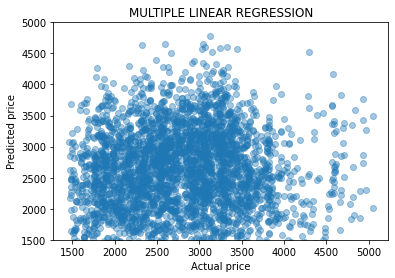

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y, dict, alpha=0.4)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.ylim(1500,5000)

In [29]:
avg_temp=float(input('average temperature : '))
min_temp=float(input('minimum temperature : '))
max_temp=float(input('maximum temperature : '))
rain_fall=float(input('rain fall : '))

average temperature : 15
minimum temperature : 10
maximum temperature : 20
rain fall : 0.8


In [30]:
with tf.Session() as sess:
    sess.run(model)
    
    save_path = "./saved.cpkt"
    saver.restore(sess, save_path)
    
    data = ((avg_temp, min_temp, max_temp, rain_fall), )
    arr = np.array(data, dtype=np.float32)
    
    x_data = arr[0:4]
    dict = sess.run(hypothesis, feed_dict={X:x_data})
    print("predict price :", dict[0])

INFO:tensorflow:Restoring parameters from ./saved.cpkt
predict price : [2802.945]


In [31]:
import numpy as np
from pandas.io.parsers import read_csv

model=tf.compat.v1.global_variables_initializer()

data = read_csv("./data.csv", sep=',')

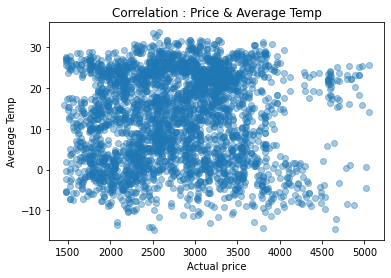

In [32]:
plt.scatter(data[['avgPrice']], data[['avgTemp']], alpha=0.4)
plt.xlabel("Actual price")
plt.ylabel("Average Temp")
plt.title("Correlation : Price & Average Temp")
plt.show()

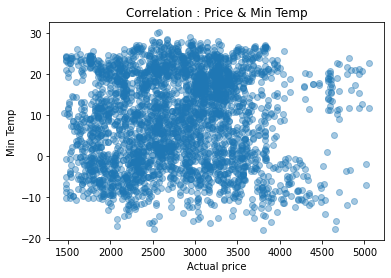

In [33]:
plt.scatter(data[['avgPrice']], data[['minTemp']], alpha=0.4)
plt.xlabel("Actual price")
plt.ylabel("Min Temp")
plt.title("Correlation : Price & Min Temp")
plt.show()

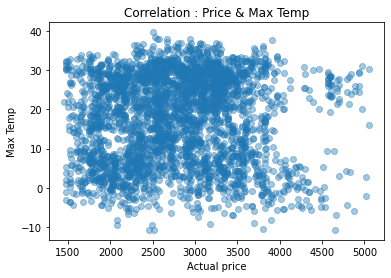

In [34]:
plt.scatter(data[['avgPrice']], data[['maxTemp']], alpha=0.4)
plt.xlabel("Actual price")
plt.ylabel("Max Temp")
plt.title("Correlation : Price & Max Temp")
plt.show()

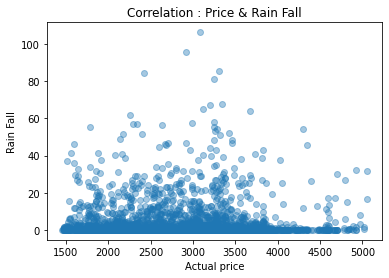

In [35]:
plt.scatter(data[['avgPrice']], data[['rainFall']], alpha=0.4)
plt.xlabel("Actual price")
plt.ylabel("Rain Fall")
plt.title("Correlation : Price & Rain Fall")
plt.show()

In [36]:
dict_list=[]

for i in range(3288):
    dict_list.append(dict[0])

In [37]:
from sklearn.metrics import mean_squared_error

print('RMSE : ', np.sqrt(mean_squared_error(dict_list, y)))

RMSE :  685.7074


In [38]:
from sklearn.metrics import mean_absolute_error

print('MAE : ', mean_absolute_error(dict_list, y))

MAE :  562.0332
